Files already downloaded and verified
Files already downloaded and verified


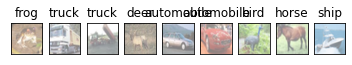

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F

#Converting data to torch.FloatTensor
transform = transforms.ToTensor()

# Download the training and test datasets
train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

#Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, num_workers=0)

#Utility functions to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

#Define the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

#Plot the images
fig = plt.figure()
# display 20 images
for idx in np.arange(9):
    ax = fig.add_subplot(1, 9, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [ ]:
#Define the Convolutional Autoencoder
# class ConvAutoencoder(nn.Module):
#     def __init__(self):
#         super(ConvAutoencoder, self).__init__()
       
#         #Encoder
#         self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
#         self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
       
#         #Decoder
#         self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
#         self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = self.pool(x)
#         x = F.relu(self.conv2(x))
#         x = self.pool(x)
#         x = F.relu(self.t_conv1(x))
#         x = torch.sigmoid(self.t_conv2(x))
              
#         return x
# def build_net(nz=200):

# 	input_depth=3
# 	input_rows=64
# 	input_columns=64

# 	F=32 

# 	# encoder

# 	enc = InputLayer(shape=(None,3,64,64))
# 	enc = Conv2DLayer(incoming=enc, num_filters=F*2, filter_size=5,stride=2, nonlinearity=lrelu(0.2),pad=2)
# 	enc = Conv2DLayer(incoming=enc, num_filters=F*4, filter_size=5,stride=2, nonlinearity=lrelu(0.2),pad=2)
# 	enc = Conv2DLayer(incoming=enc, num_filters=F*8, filter_size=5,stride=2, nonlinearity=lrelu(0.2),pad=2)
# 	enc = Conv2DLayer(incoming=enc, num_filters=F*8, filter_size=5,stride=2, nonlinearity=lrelu(0.2),pad=2)
# 	enc = reshape(incoming=enc, shape=(-1,F*8*4*4))
# 	enc = DenseLayer(incoming=enc, num_units=nz, nonlinearity=sigmoid)
	
# 	# decoder
	
# 	dec = InputLayer(shape=(None,nz))
# 	dec = DenseLayer(incoming=dec, num_units=F*8*4*4)
# 	dec = reshape(incoming=dec, shape=(-1,F*8,4,4))
# 	dec = Deconv2DLayer(incoming=dec, num_filters=F*8, filter_size=4, stride=2, nonlinearity=relu, crop=1)
# 	dec = Deconv2DLayer(incoming=dec, num_filters=F*4, filter_size=4, stride=2, nonlinearity=relu, crop=1)
# 	dec = Deconv2DLayer(incoming=dec, num_filters=F*2, filter_size=4, stride=2, nonlinearity=relu, crop=1)
# 	dec = Deconv2DLayer(incoming=dec, num_filters=1, filter_size=4, stride=2, nonlinearity=sigmoid, crop=1)

# 	return enc, dec

#Instantiate the model
model = ConvAutoencoder()
print(model)

#Loss function
criterion = nn.BCELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
model.to(device)

#Epochs
n_epochs = 100

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

    #Training
    for data in train_loader:
        images, _ = data
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
          
    train_loss = train_loss/len(train_loader)
    if epoch % 20 == 0:
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

#Batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

#Sample outputs
images = images.to(device)
output = model(images)
images = images.cpu().numpy()

batch_size=32
output = output.view(batch_size, 3, 32, 32)
output = output.detach().cpu().numpy()

#Original Images
print("Original Images")
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
plt.show()

#Reconstructed Images
print('Reconstructed Images')
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    ax.set_title(classes[labels[idx]])
plt.show() 